In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [7]:
eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


In [8]:
#Filtrando coluna com as condições

num_nasc = eel[(eel['util'] == 'nasc') & (eel['num_nasc'] < 200)]

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

#lista com nome das colunas referentes a datas
datas = ['date_hoje', 
         'date_nasc', 
         'data_inicio', 
         'date_acas', 
         'date_nasc_acas', 
         'date_sex', 
         'data_solic', 
         'data_forn', 
         'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for c in datas:
    num_nasc[c] = pd.to_datetime(num_nasc[c], unit = 's') #indica o formato das datas
    
num_nasc.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [9]:
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

len(num_nasc[
    (num_nasc['ling'] != ling_ex[0]) &
    (num_nasc['ling'] != ling_ex[1]) &
    (num_nasc['ling'] != ling_ex[2]) &
    (num_nasc['ling'] != ling_ex[3]) &
    (num_nasc['ling'] != ling_ex[4]) &
    (num_nasc['ling'] != ling_ex[5]) &
    (num_nasc['ling'] != ling_ex[6]) &
    (num_nasc['ling'] != ling_ex[7]) &
    (num_nasc['ling'] != ling_ex[8]) &
    (num_nasc['ling'] != ling_ex[9]) &
    (num_nasc['ling'] != ling_ex[10]) &
    (num_nasc['ling'] != ling_ex[11]) &
    (num_nasc['ling'] != ling_ex[12]) &
    (num_nasc['ling'] != ling_ex[13])
])


1785

In [10]:
num_nasc['ling'].item(ling_ex)

TypeError: item() takes 1 positional argument but 2 were given

In [11]:
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

#Fiz uma condição para que as linhagens da lista acima fosse filtradas e descartadas da análise


#if all(num_nasc['ling'] != tuple(ling_ex) for num_nasc['ling'] in ling_ex): #função all(iterável)`Retorna `True` se todos os elementos do iterável forem verdadeiros (ou se o iterável for vazio).
if all(num_nasc['ling'] != tuple(ling_ex)): #função all(iterável)`Retorna `True` se todos os elementos do iterável forem verdadeiros (ou se o iterável for vazio).
    #Transformei a lista numa tupla pq o tamanho como lista estava interferindo, resultando em erro
    print ('deu') #caso fosse TRUE
else:
    print('nao deu') #se não fosse, era pra printar que "não deu"
    

#O que eu queria? 
#R. Transformar o filtro acima em apenas uma linha, no qual filtrasse todas as linhagens que não serão usadas na analise

#O que eu fiz?
#R. Fiz uma condição, utilizando a função all que vai retornar verdadeiro se realmente ocorreu o filtro.
#Dentro da Dataframe na coluna ling o que for diferente da lista ling_ex. A lista foi transformada em 
#uma tupla, pois como lista o tamanho entre os eventos e o que existia na lista não batiam, sendo necessário
#criar a tupla. Com a condição pra if se deu certo, ou voltar "não deu" caso voltasse se não.



deu


In [12]:
#Filtrando linhagens a não serem utilizadas

tirar_ling

NameError: name 'tirar_ling' is not defined

In [13]:
#Filtrando linhagens a não serem utilizadas

tirar_ling = num_nasc[
    (num_nasc['ling'] != ling_ex[0]) &
    (num_nasc['ling'] != ling_ex[1]) &
    (num_nasc['ling'] != ling_ex[2]) &
    (num_nasc['ling'] != ling_ex[3]) &
    (num_nasc['ling'] != ling_ex[4]) &
    (num_nasc['ling'] != ling_ex[5]) &
    (num_nasc['ling'] != ling_ex[6]) &
    (num_nasc['ling'] != ling_ex[7]) &
    (num_nasc['ling'] != ling_ex[8]) &
    (num_nasc['ling'] != ling_ex[9]) &
    (num_nasc['ling'] != ling_ex[10]) &
    (num_nasc['ling'] != ling_ex[11]) &
    (num_nasc['ling'] != ling_ex[12]) &
    (num_nasc['ling'] != ling_ex[13])
]
len(tirar_ling)

1785

In [14]:
#O que fazer ? Montar uma decomposição em série por linhagem - 

# criada uma dataframe com coluna de linhagens, nascimentos e datas

serie_temp_ling = pd.DataFrame(tirar_ling['date_hoje'])
serie_temp_ling['ling'] = tirar_ling['ling'] #criação da DataFrame "tirar_ling com a coluna de data"
serie_temp_ling['num_nasc'] = tirar_ling['num_nasc']#criação de coluna(serie_temp) que estará inserida na DataFrame
serie_temp_ling = serie_temp_ling.set_index('date_hoje') #identificando a nova coluna como index data_hoje
serie_temp_ling.head()

,ling,num_nasc
date_hoje,,
2014-09-23 17:40:33,Swiss E,5
2014-09-23 17:40:33,Swiss E,10
2014-09-23 17:40:33,Swiss C,20
2014-09-23 17:40:47,Swiss E,10
2014-09-23 17:40:47,Swiss E,20


In [15]:
serie_temp_ling['ling'].value_counts()

Balb/c       498
C57BL/6      425
S129KO       247
129/SV-E     102
C3H          102
S129WT        41
C57BL06WT     35
Swiss-2 C     27
Swiss-1 E     25
DBA/1J        24
Swiss-2 B     24
Swiss-1 A     23
Swiss E       22
Swiss-2 E     21
Swiss-2 A     21
Swiss-1 B     21
Swiss-2 D     21
Swiss-1 D     18
Swiss-1 C     17
Swiss C       15
Swiss A       14
Swiss D       13
Swiss B       11
AG129          9
 S129WT        6
 S129KO        3
Name: ling, dtype: int64

In [16]:
#total de nascidos Balb/c
serie_temp_ling[serie_temp_ling['ling'] == 'Balb/c']['num_nasc'].sum()

4289

In [17]:
#serie_temp_ling[(serie_temp_ling['ling'] == 'S129WT') | (serie_temp_ling['ling'] == ' S129WT')].info()

In [18]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

serie_temp_ling['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == '129/SV-E')].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2014-10-21 12:43:17 to 2019-06-13 14:42:22
Data columns (total 2 columns):
ling        149 non-null object
num_nasc    149 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [19]:
#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

serie_temp_ling['ling'].replace(' S129KO', 'S129KO', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'S129KO')].info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2014-10-21 13:02:34 to 2019-05-29 18:04:17
Data columns (total 2 columns):
ling        250 non-null object
num_nasc    250 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


In [20]:
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

serie_temp_ling['ling'].replace('C57BL06WT', 'C57BL/6', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'C57BL/6')].info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460 entries, 2014-11-11 12:25:07 to 2019-06-14 14:04:31
Data columns (total 2 columns):
ling        460 non-null object
num_nasc    460 non-null int64
dtypes: int64(1), object(1)
memory usage: 10.8+ KB


In [21]:
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

serie_temp_ling['ling'].replace('Swiss A', 'Swiss-1 A', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 A')].info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2014-12-09 11:54:38 to 2019-03-15 13:25:41
Data columns (total 2 columns):
ling        37 non-null object
num_nasc    37 non-null int64
dtypes: int64(1), object(1)
memory usage: 888.0+ bytes


In [22]:
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

serie_temp_ling['ling'].replace('Swiss B', 'Swiss-1 B', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 B')].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2014-09-23 18:13:24 to 2019-03-15 13:25:41
Data columns (total 2 columns):
ling        32 non-null object
num_nasc    32 non-null int64
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [23]:
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

serie_temp_ling['ling'].replace('Swiss C', 'Swiss-1 C', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 C')].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2014-09-23 17:40:33 to 2019-03-15 13:25:41
Data columns (total 2 columns):
ling        32 non-null object
num_nasc    32 non-null int64
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [24]:
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

serie_temp_ling['ling'].replace('Swiss D', 'Swiss-1 D', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 D')].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2014-09-23 18:13:24 to 2019-03-15 13:25:41
Data columns (total 2 columns):
ling        31 non-null object
num_nasc    31 non-null int64
dtypes: int64(1), object(1)
memory usage: 744.0+ bytes


In [25]:
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

serie_temp_ling['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
serie_temp_ling[(serie_temp_ling['ling'] == 'Swiss-1 E')].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2014-09-23 17:40:33 to 2019-03-15 13:25:42
Data columns (total 2 columns):
ling        47 non-null object
num_nasc    47 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [26]:
serie_temp_ling['ling'].drop_duplicates().sort_values()

date_hoje
2014-10-21 12:43:17     129/SV-E
2018-03-16 19:09:05        AG129
2014-11-11 11:50:50       Balb/c
2016-02-11 15:32:29          C3H
2014-11-11 12:25:07      C57BL/6
2019-04-30 14:15:38       DBA/1J
2014-10-21 13:02:34       S129KO
2014-12-09 11:54:38    Swiss-1 A
2014-09-23 18:13:24    Swiss-1 B
2014-09-23 17:40:33    Swiss-1 C
2014-09-23 18:13:24    Swiss-1 D
2014-09-23 17:40:33    Swiss-1 E
2016-07-11 16:47:54    Swiss-2 A
2016-07-27 15:12:23    Swiss-2 B
2016-08-02 17:48:47    Swiss-2 C
2016-08-02 17:51:08    Swiss-2 D
2016-07-27 15:14:44    Swiss-2 E
Name: ling, dtype: object

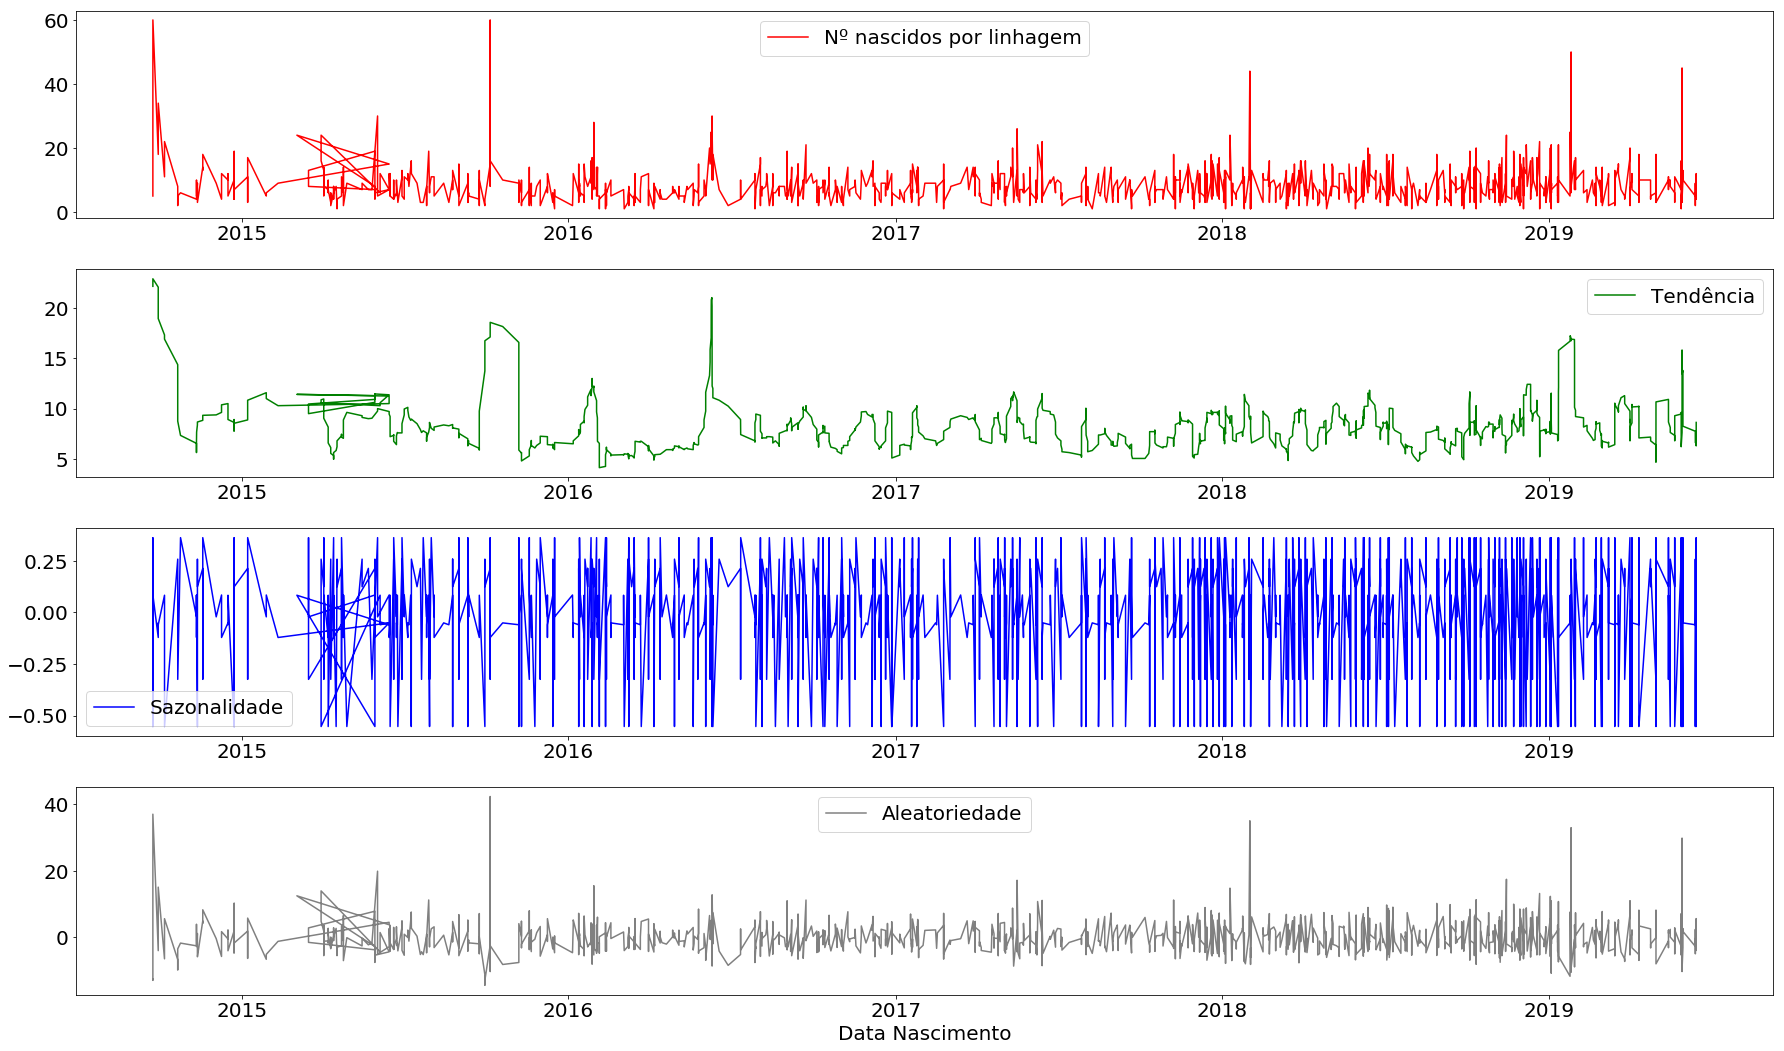

In [27]:
#Decomposição em série de todas as linhagens

ser_temp_ling = serie_temp_ling['num_nasc']
decom = seasonal_decompose(ser_temp_ling, freq=12)

#Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Nº nascidos por linhagem', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()

In [29]:
'''
'129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6'
'DBA/1J', 'S129KO', 'Swiss-1 A', 'Swiss-1 B',
'Swiss-1 C, 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A
'Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E'
'''

#Filtrando a linhagem da coluna ling e plotando seu numero de nascidos

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'AG129']['num_nasc'] #'AG129'
decom = seasonal_decompose(ser_temp_ling, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Nº nascidos', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()

ValueError: operands could not be broadcast together with shapes (9,) (17,) 

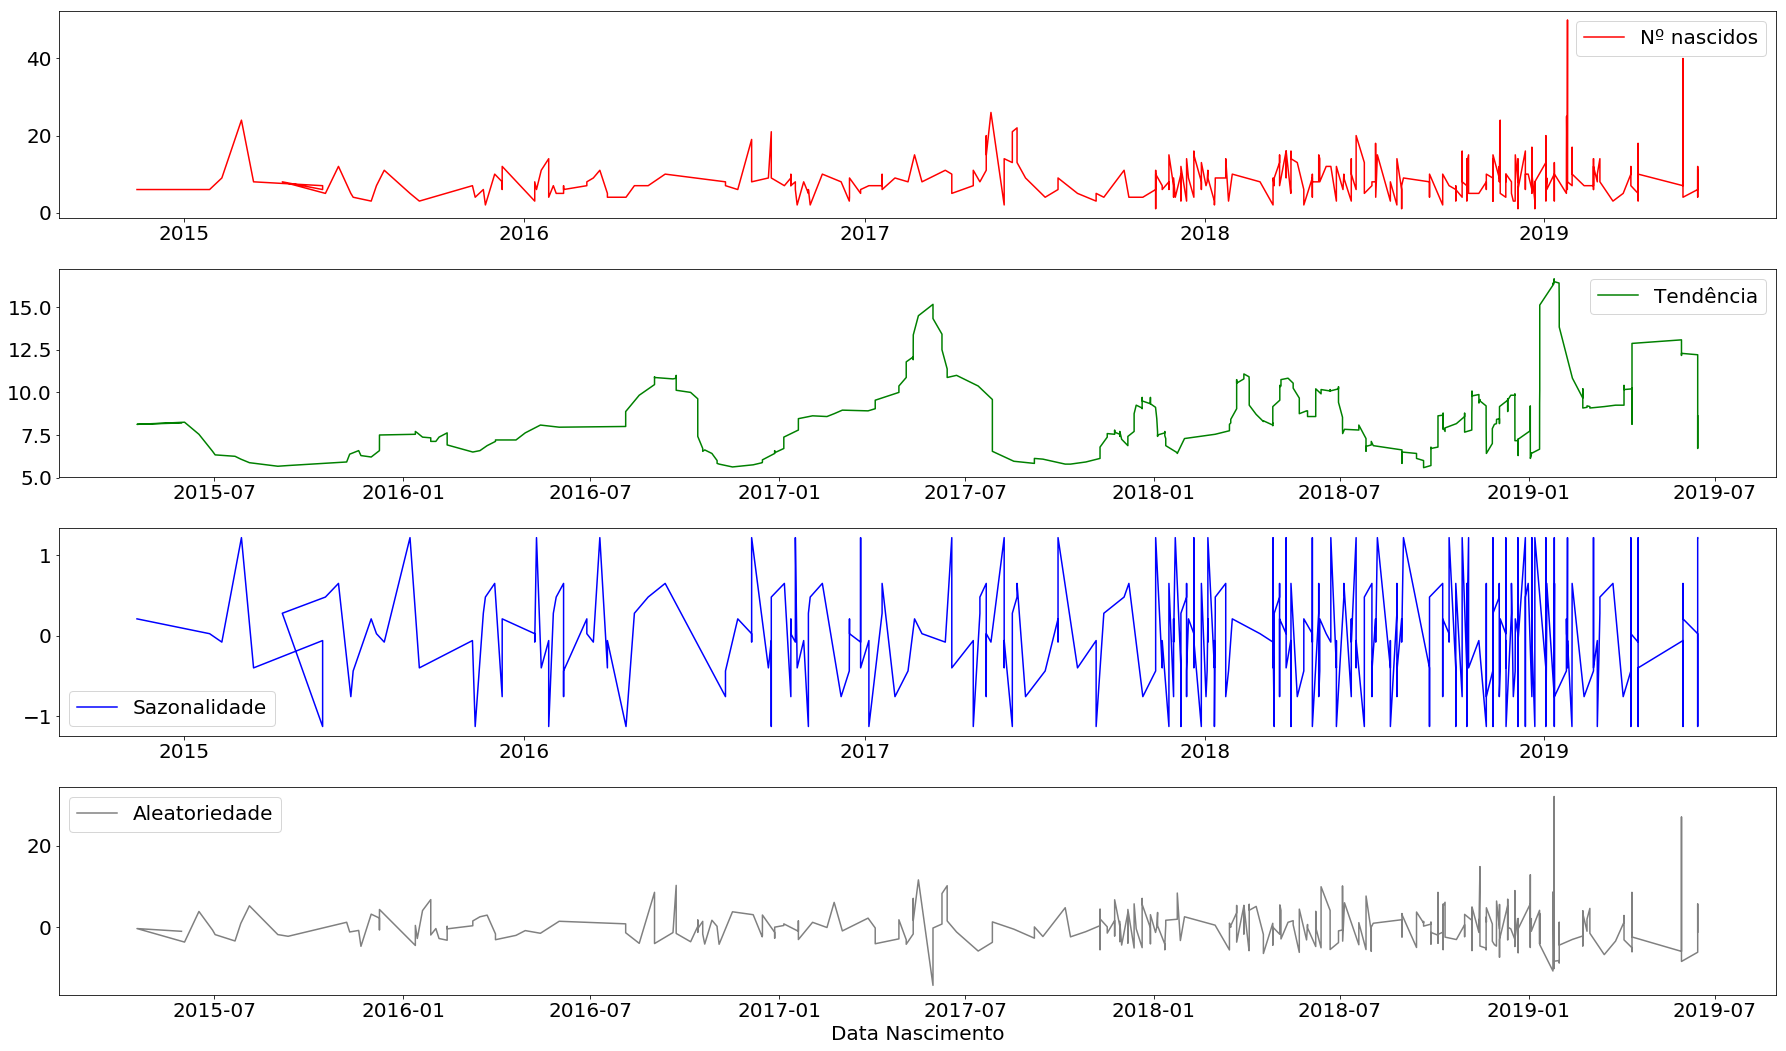

In [30]:
'''
'129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6'
'DBA/1J', 'S129KO', 'Swiss-1 A', 'Swiss-1 B',
'Swiss-1 C, 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A
'Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E'
'''

#Filtrando a linhagem da coluna ling e plotando seu numero de nascidos

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == 'C57BL/6']['num_nasc']
decom = seasonal_decompose(ser_temp_ling, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Nº nascidos', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()

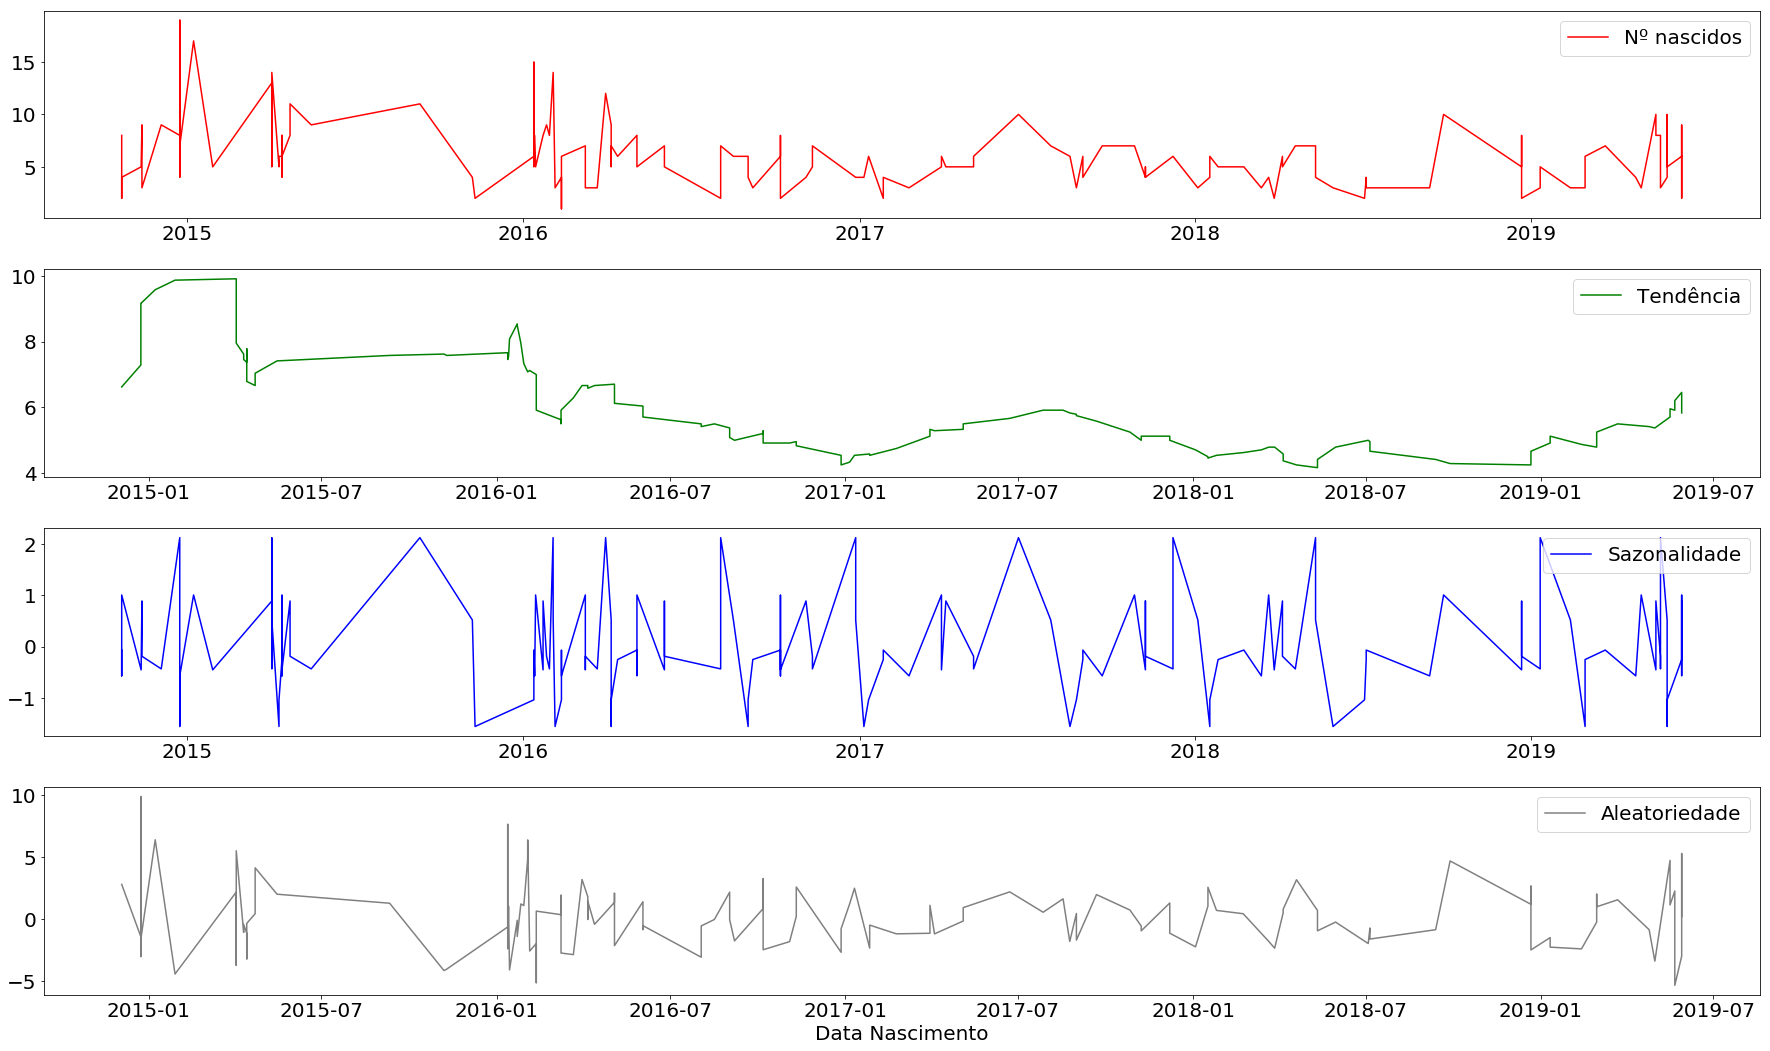

In [31]:
'''
'129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6'
'DBA/1J', 'S129KO', 'Swiss-1 A', 'Swiss-1 B',
'Swiss-1 C, 'Swiss-1 D', 'Swiss-1 E', 'Swiss-2 A
'Swiss-2 B', 'Swiss-2 C', 'Swiss-2 D','Swiss-2 E'
'''

#Filtrando a linhagem da coluna ling e plotando seu numero de nascidos

ser_temp_ling = serie_temp_ling[serie_temp_ling['ling'] == '129/SV-E']['num_nasc']
decom = seasonal_decompose(ser_temp_ling, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])

plt.subplot(4, 1, 1)
plt.plot(ser_temp_ling, label = 'Nº nascidos', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()

In [ ]:
test = pd.DataFrame(tirar_ling['ling'])
test['ling'] = tirar_ling['ling']
test['date_hoje'] = tirar_ling['date_hoje']#criação da DataFrame "tirar_ling com a coluna de data"
test['date_nasc_acas'] = tirar_ling['date_nasc_acas']
test['date_sex'] = tirar_ling['date_sex']
test['num_nasc'] = tirar_ling['num_nasc']#criação de coluna(serie_temp) que estará inserida na DataFrame

#test = test.set_index('ling') #identificando a nova coluna como index data_hoje
test.head()

In [ ]:
#Perspectivas 2° semestre mestrado

#Nascimentos por linhagem por período mensal/ anual 

inic = test.loc[test.index.min(), "date_hoje"] 
fim = test.loc[test.index.max(), "date_hoje"]
#num_nasc = 
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#serie_temp_ling.query("ling == 'C57BL/6'").plot( #filtrando a coluna ling e pedindo por linhagem 
test[test['ling'] == 'C3H'].plot(
        kind='area', #tipo de grafico
        x='date_hoje',
        y='num_nasc',
        figsize=(25, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
        )
#acima no title está sendo indicado por dia, mes e ano da primeira entrada até a última.

plt.legend(['Número de animais'])
plt.xlabel('Data Nascimento')
plt.ylabel('Quantidade Nascidos')


In [ ]:
#Perspectivas 2° semestre mestrado

#Acasalamento por período mensal/ anual

acas = pd.DataFrame(test['date_nasc_acas'])
test[test['ling'] == 'C3H'].plot( #ver erro 
        kind='area', #tipo de grafico
        x='date_nasc_acas',
        y='num_nasc',
        figsize=(25, 5),
        colormap='RdBu',
        title=f'Acasalamento por linhagem {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais'])
plt.xlabel('Data Nascimento')
plt.ylabel('Quantidade Nascidos')

In [ ]:

sexa = pd.DataFrame(test['date_sex'])
test[test['ling'] == 'C3H'].plot( #ver erro 
        kind='area', #tipo de grafico
        x='date_sex',
        y='num_nasc',
        figsize=(25, 5),
        colormap='RdBu',
        title=f'Sexagem por linhagem {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais'])
plt.xlabel('Data Nascimento')
plt.ylabel('Quantidade Nascidos')

In [ ]:
num_nasc = eel[(eel['util'] == 'nasc') & (eel['num_sex_m'] < 200) & (eel['num_sex_f'] < 200)]


In [ ]:
# 129/SV-E
# AG129
# Balb/c
# C3H
# C57BL/6
# DBA/1J
# S129KO
# Swiss-1 A
# Swiss-1 B
# Swiss-1 C
# Swiss-1 D
# Swiss-1 E
# Swiss-2 A
# Swiss-2 B
# Swiss-2 C
# Swiss-2 D
# Swiss-2 E